In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import random
import matplotlib.pyplot as plt

from graspologic.inference import (
    LatentPositionTest,
    LatentDistributionTest,
)
from graspologic.embed import AdjacencySpectralEmbed
from graspologic.simulations import sbm, rdpg
from graspologic.utils import symmetrize
from graspologic.plot import heatmap, pairplot


ImportError: cannot import name 'LatentPositionTest' from 'graspologic.inference' (/Users/kareefullah/Desktop/Graspy_Workspace/graspologic/graspologic/inference/__init__.py)

In [2]:
n_components = 4
P = np.array(
    [[0.9, 0.11, 0.13, 0.2], [0, 0.7, 0.1, 0.1], [0, 0, 0.8, 0.1], [0, 0, 0, 0.85]]
)
P = symmetrize(P)
n_verts = []
p_vals = []

In [3]:
#run sim for latent position test
for n in range(50, 201, 10):
    for _ in range(0, 10):
        csize = [n] * 4
        A1 = sbm(csize, P)
        A2 = sbm(csize, P)
        lpt_class = LatentPositionTest(n_bootstraps=500, n_components=n_components)
        lpt_class.fit(A1, A2)
        
        p_vals.append(lpt_class.p_value_)
        n_verts.append(n)
        print(lpt_class.p_value_)
p_vals_dict = {"p-values class": p_vals}
df = pd.DataFrame(data = p_vals_dict, index = n_verts)
df.to_csv('p_values_lpt2.csv')

0.6786427145708582
0.1317365269461078
0.8423153692614771
0.874251497005988
0.6487025948103793
0.9101796407185628
0.782435129740519
0.14171656686626746
0.46107784431137727
0.9021956087824351
0.2954091816367265
0.5968063872255489
0.780439121756487
0.5069860279441117
0.29141716566866266
0.23353293413173654
0.4231536926147705
0.998003992015968
0.7085828343313373
0.8862275449101796
0.1536926147704591
0.7265469061876247
0.9840319361277445
0.6347305389221557
0.021956087824351298
0.6147704590818364
0.590818363273453
0.8962075848303394
0.47105788423153694
0.4251497005988024
0.8083832335329342
0.7385229540918163
0.7744510978043913
0.5269461077844312
0.04590818363273453
0.19760479041916168
0.7005988023952096
0.8702594810379242
0.5149700598802395
0.7664670658682635
0.1317365269461078
0.25149700598802394
0.718562874251497
0.5728542914171657
0.1157684630738523
0.3932135728542914
0.7884231536926147
0.4091816367265469
0.16766467065868262
0.3652694610778443
0.46706586826347307
0.8003992015968064
0.5389

In [6]:
#fixed sbm for A1
A1 = sbm([100]*4, P)
n_verts = []
p_vals = []

In [7]:
#run sim for LDT
for n in range(100, 301, 10):
    for _ in range(0, 10):
        csize = [n] * 4
        A2 = sbm(csize, P)
        ldt_class = LatentDistributionTest(n_bootstraps=500, n_components=n_components, size_correction=True)
        ldt_class.fit(A1, A2)
        
        p_vals.append(ldt_class.p_value_)
        n_verts.append(n)
        print(ldt_class.p_value_)
p_vals_dict = {"p-values class": p_vals}
df = pd.DataFrame(data = p_vals_dict, index = n_verts)
df.to_csv('p_values_ldt.csv')

0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.078
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.026
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.02
0.018
0.002
0.002
0.002
0.006
0.002
0.002
0.274
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.834
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.992
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.046
0.002
0.05
0.254
0.152
0.002
0.84
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.248
0.302
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.33
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.012
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.002
0.

          0-0.09  0.1-0.19  0.2-0.29  0.3-0.39  0.4-0.49  0.5-0.59  0.6-0.69  \
0.678643      16        19        18        12        16        19        13   
0.131737      16        19        18        12        16        19        13   
0.842315      16        19        18        12        16        19        13   
0.874251      16        19        18        12        16        19        13   
0.648703      16        19        18        12        16        19        13   
...          ...       ...       ...       ...       ...       ...       ...   
0.916168      16        19        18        12        16        19        13   
0.117764      16        19        18        12        16        19        13   
0.956088      16        19        18        12        16        19        13   
0.688623      16        19        18        12        16        19        13   
0.289421      16        19        18        12        16        19        13   

          0.7-0.79  0.8-0.89  0.9-0.99 

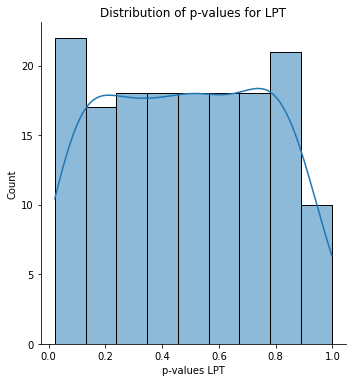

In [5]:
#displot for LPT
with open('p_values_lpt2.csv', 'r') as csvFile:
    csvReader = csv.reader(csvFile)
    headers = next(csvReader)
    p_vals_lpt = []
    for row in csvReader:
        p_vals_lpt.append((float)(row[1]))
    
    lpt_dict = {'0-0.09': 0, 
                '0.1-0.19': 0, 
                '0.2-0.29': 0, 
                '0.3-0.39': 0, 
                '0.4-0.49': 0,
                '0.5-0.59': 0, 
                '0.6-0.69': 0, 
                '0.7-0.79': 0,
                '0.8-0.89': 0, 
                '0.9-0.99': 0}
    p_list = ['0-0.09', '0.1-0.19', '0.2-0.29', '0.3-0.39', '0.4-0.49', '0.5-0.59', '0.6-0.69', '0.7-0.79',
              '0.8-0.89', '0.9-0.99']
    
    for p in p_vals_lpt:
        index = 0
        if(0<=p<0.1):
            index = 0
        if(0.1<=p<0.2):
            index = 1
        if(0.2<=p<0.3):
            index = 2
        if(0.3<=p<0.4):
            index = 3
        if(0.4<=p<0.5):
            index = 4
        if(0.5<=p<0.6):
            index = 5
        if(0.6<=p<0.7):
            index = 6
        if(0.7<=p<0.8):
            index = 7
        if(0.8<=p<0.9):
            index = 8
        if(0.9<=p<1):
            index = 9
        lpt_dict[p_list[index]] += 1
    df = pd.DataFrame(data=lpt_dict, index = p_vals_lpt)
    print(df)
    lpt_plot = sns.displot(data=df,x=p_vals_lpt, kde=True)
    plt.xlabel('p-values LPT')
    plt.title('Distribution of p-values for LPT')
    plt.savefig('lpt_displot.png', bbox_inches = 'tight')

       0-0.09  0.1-0.19  0.2-0.29  0.3-0.39  0.4-0.49  0.5-0.59  0.6-0.69  \
0.002     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   
...       ...       ...       ...       ...       ...       ...       ...   
0.002     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   
0.034     200         2         3         2         0         0         0   
0.002     200         2         3         2         0         0         0   

       0.7-0.79  0.8-0.89  0.9-0.99  
0.002         0         2         1  

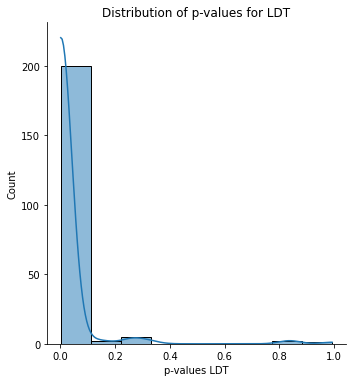

In [4]:
#displot for LDT
with open('p_values_ldt.csv', 'r') as csvFile:
    csvReader = csv.reader(csvFile)
    headers = next(csvReader)
    p_vals_ldt = []
    for row in csvReader:
        p_vals_ldt.append((float)(row[1]))
    
    ldt_dict = {'0-0.09': 0, 
                '0.1-0.19': 0, 
                '0.2-0.29': 0, 
                '0.3-0.39': 0, 
                '0.4-0.49': 0,
                '0.5-0.59': 0, 
                '0.6-0.69': 0, 
                '0.7-0.79': 0,
                '0.8-0.89': 0, 
                '0.9-0.99': 0}
    p_list = ['0-0.09', '0.1-0.19', '0.2-0.29', '0.3-0.39', '0.4-0.49', '0.5-0.59', '0.6-0.69', '0.7-0.79',
              '0.8-0.89', '0.9-0.99']
    
    for p in p_vals_ldt:
        index = 0
        if(0<=p<0.1):
            index = 0
        if(0.1<=p<0.2):
            index = 1
        if(0.2<=p<0.3):
            index = 2
        if(0.3<=p<0.4):
            index = 3
        if(0.4<=p<0.5):
            index = 4
        if(0.5<=p<0.6):
            index = 5
        if(0.6<=p<0.7):
            index = 6
        if(0.7<=p<0.8):
            index = 7
        if(0.8<=p<0.9):
            index = 8
        if(0.9<=p<1):
            index = 9
        ldt_dict[p_list[index]] += 1
    df = pd.DataFrame(data=ldt_dict, index = p_vals_ldt)
    print(df)
    ldt_plot = sns.displot(data=df,x=p_vals_ldt, kde=True)
    plt.xlabel('p-values LDT')
    plt.title('Distribution of p-values for LDT')
    plt.savefig('ldt_displot.png', bbox_inches = 'tight')